<a href="https://colab.research.google.com/github/12dashka34/kosmetology/blob/main/%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%22roboflow_skin_pr_effnet%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5StL1Qg1FZyDiE2CWlpl")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

In [ ]:
project = rf.workspace("parin-kittipongdaja-vwmn3").project("skin-problem-multilabel")
version = project.version(1)
dataset = version.download("folder")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Skin-Problem-MultiLabel-1 in folder:: 100%|██████████| 4906/4906 [00:02<00:00, 2167.34it/s]


In [ ]:
dataset_directory = '/content/Skin-Problem-MultiLabel-1'

In [ ]:
import os
# Каталог з даними для навчання
train_dir = os.path.join(dataset_directory,'train')
# Каталог з даними для перевірки
valid_dir = os.path.join(dataset_directory,'valid')
# Каталог з даними для тестування
test_dir = os.path.join(dataset_directory,'test')

In [ ]:
import os
import shutil

# Define the list of class folders you want to keep
classes_to_keep = ['Dry Skin', 'Normal Skin', 'Oily Skin']

# Function to select and leave only specific class folders
def select_class_folders(directory):
    for root, dirs, files in os.walk(directory):
        for folder in dirs[:]:
            if folder not in classes_to_keep:
                # If the folder is not in the list of classes to keep, remove it
                shutil.rmtree(os.path.join(root, folder))

# Select and leave only specific class folders in the train, test, and valid directories
select_class_folders(train_dir)
select_class_folders(test_dir)
select_class_folders(valid_dir)


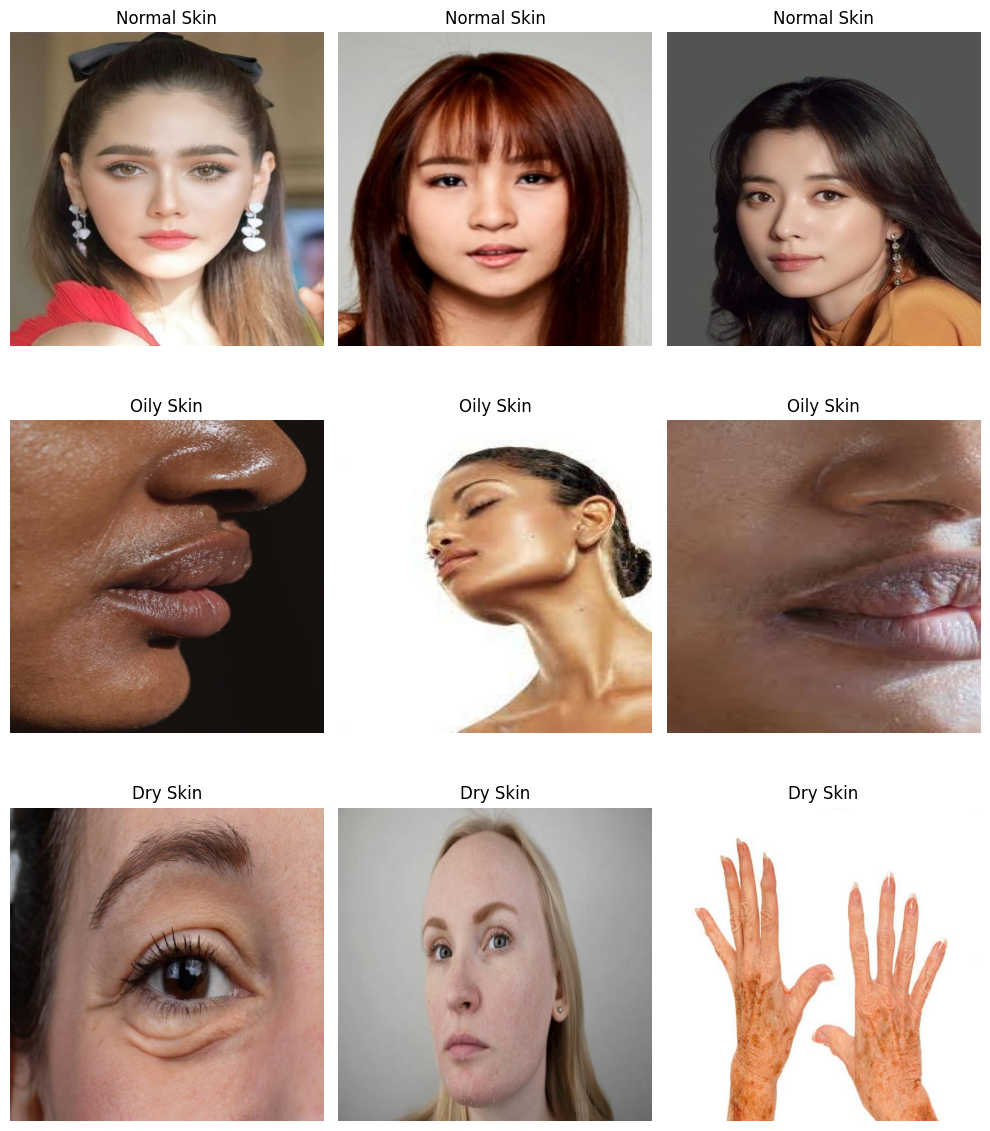

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 3x3 configuration
nrows = 3
ncols = 3

# Set up matplotlib fig, and size it to fit 3x3 pics
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 12))

# Iterate over each skin type folder
for i, skin in enumerate(filter(lambda f: not f.startswith('_'), os.listdir(train_dir))):
    if not os.path.isdir(os.path.join(train_dir, skin)):
        continue
    # Get file names in the current skin type folder
    file_names = os.listdir(os.path.join(train_dir, skin))

    # Take only the first 3 images for demonstration
    for j, file_name in enumerate(file_names[:3]):
        # Read the image
        img_path = os.path.join(train_dir, skin, file_name)
        img = mpimg.imread(img_path)

        # Plot the image in the corresponding subplot
        ax = axes[i, j]
        ax.imshow(img)
        ax.axis('off')  # Turn off axis

        # Set title as the skin type
        ax.set_title(skin)

plt.tight_layout()  # Adjust layout
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
from tensorflow import keras

In [ ]:
print(tf.__version__)

2.15.0


AttributeError: module 'tensorflow.keras' has no attribute '__version__'

In [ ]:
batch_size=24

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

preprocess_func = tf.keras.applications.efficientnet.preprocess_input

train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_func,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
  preprocessing_function = preprocess_func)

valid_datagen = ImageDataGenerator(
  preprocessing_function = preprocess_func)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 643 images belonging to 3 classes.
Found 95 images belonging to 3 classes.
Found 191 images belonging to 3 classes.


In [ ]:
base_model = tf.keras.applications.EfficientNetB3(
    input_shape=(224,224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

43941136/43941136 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
len_classes = len(set(train_generator.classes)) # 3 classes

model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(len_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 dense (Dense)               (None, 300)               461100    
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 batch_normalization (Batch  (None, 150)               600       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 4

In [ ]:
initial_epochs = 15

In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    epochs=initial_epochs,
    callbacks=[
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min')
    ]
)

Epoch 1/15
27/27 [==============================] - 32s 592ms/step - loss: 0.9316 - accuracy: 0.6143 - val_loss: 0.7796 - val_accuracy: 0.7435 - lr: 5.0000e-04
Epoch 2/15
27/27 [==============================] - 10s 373ms/step - loss: 0.5354 - accuracy: 0.7714 - val_loss: 0.7303 - val_accuracy: 0.7068 - lr: 5.0000e-04
Epoch 3/15
27/27 [==============================] - 10s 369ms/step - loss: 0.4643 - accuracy: 0.8040 - val_loss: 0.8722 - val_accuracy: 0.7696 - lr: 5.0000e-04
Epoch 4/15
27/27 [==============================] - 10s 375ms/step - loss: 0.4021 - accuracy: 0.8351 - val_loss: 0.8771 - val_accuracy: 0.7382 - lr: 5.0000e-04
Epoch 5/15
27/27 [==============================] - 9s 339ms/step - loss: 0.3441 - accuracy: 0.8554 - val_loss: 0.6155 - val_accuracy: 0.8010 - lr: 1.0000e-04
Epoch 6/15
27/27 [==============================] - 10s 377ms/step - loss: 0.3877 - accuracy: 0.8414 - val_loss: 0.5910 - val_accuracy: 0.7644 - lr: 1.0000e-04
Epoch 7/15
27/27 [=======================

In [ ]:
scores = model.evaluate(test_generator, batch_size = batch_size)
print("Доля правильних відповідей на тестових даних, у відсотках:", round(scores[1] * 100, 4))

4/4 [==============================] - 0s 91ms/step - loss: 0.3098 - accuracy: 0.8632
Доля правильних відповідей на тестових даних, у відсотках: 86.3158


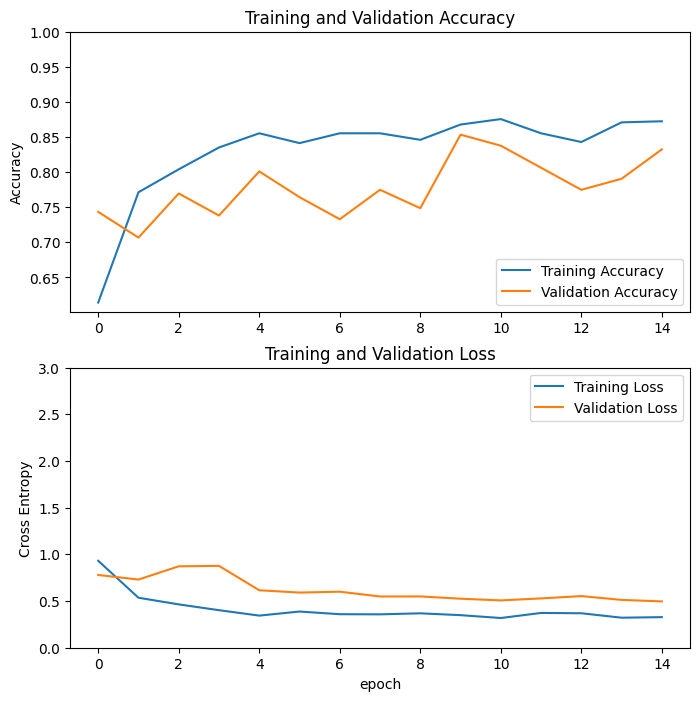

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Fine tuning

In [ ]:
for layer in base_model.layers:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 dense (Dense)               (None, 300)               461100    
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 batch_normalization (Batch  (None, 150)               600       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 4

In [ ]:
initial_epochs =  history.epoch[-1] + 1
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    epochs=total_epochs,
    initial_epoch = initial_epochs,
    callbacks=[
        EarlyStopping(monitor = "val_loss",
                               patience = 4,
                               restore_best_weights = True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min')
    ]
    )

Epoch 16/25
27/27 [==============================] - 24s 463ms/step - loss: 0.3170 - accuracy: 0.8725 - val_loss: 0.5663 - val_accuracy: 0.7696 - lr: 1.0000e-04
Epoch 17/25
27/27 [==============================] - 11s 395ms/step - loss: 0.3021 - accuracy: 0.8896 - val_loss: 0.5234 - val_accuracy: 0.8377 - lr: 1.0000e-04
Epoch 18/25
27/27 [==============================] - 10s 367ms/step - loss: 0.2735 - accuracy: 0.9036 - val_loss: 0.5228 - val_accuracy: 0.7906 - lr: 1.0000e-04
Epoch 19/25
27/27 [==============================] - 10s 369ms/step - loss: 0.2855 - accuracy: 0.8849 - val_loss: 0.6151 - val_accuracy: 0.7330 - lr: 1.0000e-04
Epoch 20/25
27/27 [==============================] - 11s 396ms/step - loss: 0.2700 - accuracy: 0.8896 - val_loss: 0.5655 - val_accuracy: 0.8325 - lr: 1.0000e-04
Epoch 21/25
27/27 [==============================] - 11s 390ms/step - loss: 0.2821 - accuracy: 0.8942 - val_loss: 0.5433 - val_accuracy: 0.8377 - lr: 2.0000e-05
Epoch 22/25
27/27 [===============

In [ ]:
scores = model.evaluate(test_generator, batch_size = batch_size)
print("Доля правильних відповідей на тестових даних, після донавчання, у відсотках:", round(scores[1] * 100, 4))

4/4 [==============================] - 0s 98ms/step - loss: 0.3415 - accuracy: 0.8947
Доля правильних відповідей на тестових даних, після донавчання, у відсотках: 89.4737


In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

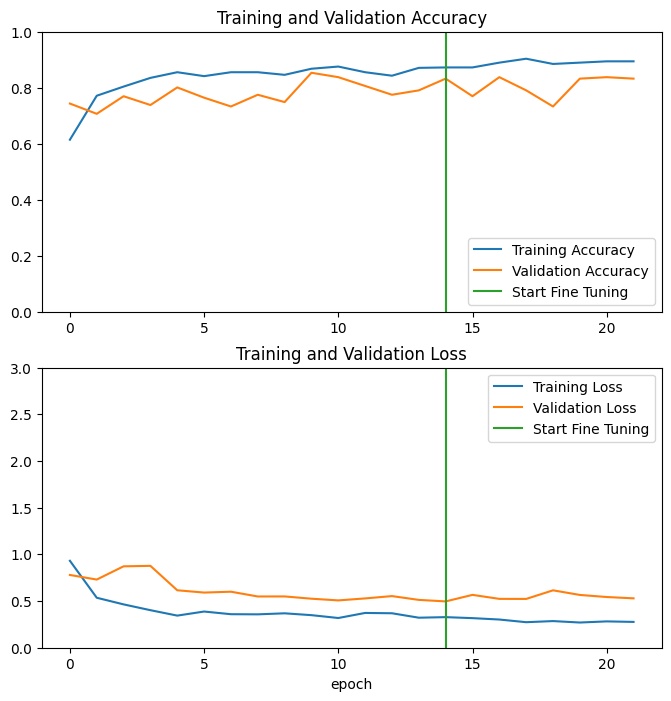

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 3.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()


Saving dry (2).jpg to dry (2).jpg
Saving dry (3).jpg to dry (3).jpg
Saving dry (4).jpg to dry (4).jpg
Saving dry (5).jpg to dry (5).jpg
Saving dry (6).jpg to dry (6).jpg
Saving dry.jpg to dry.jpg
Saving normal (2).jpg to normal (2).jpg
Saving normal (3).jpg to normal (3).jpg
Saving normal (4).jpg to normal (4).jpg
Saving normal (5).jpg to normal (5).jpg
Saving normal (6).jpg to normal (6).jpg
Saving normal.jpg to normal.jpg
Saving oily (2).jpg to oily (2).jpg
Saving oily (3).jpg to oily (3).jpg
Saving oily (5).jpg to oily (5).jpg
Saving oily (6).jpg to oily (6).jpg
Saving oily (7).jpg to oily (7).jpg
Saving oily.png to oily.png


1/1 [==============================] - 0s 29ms/step


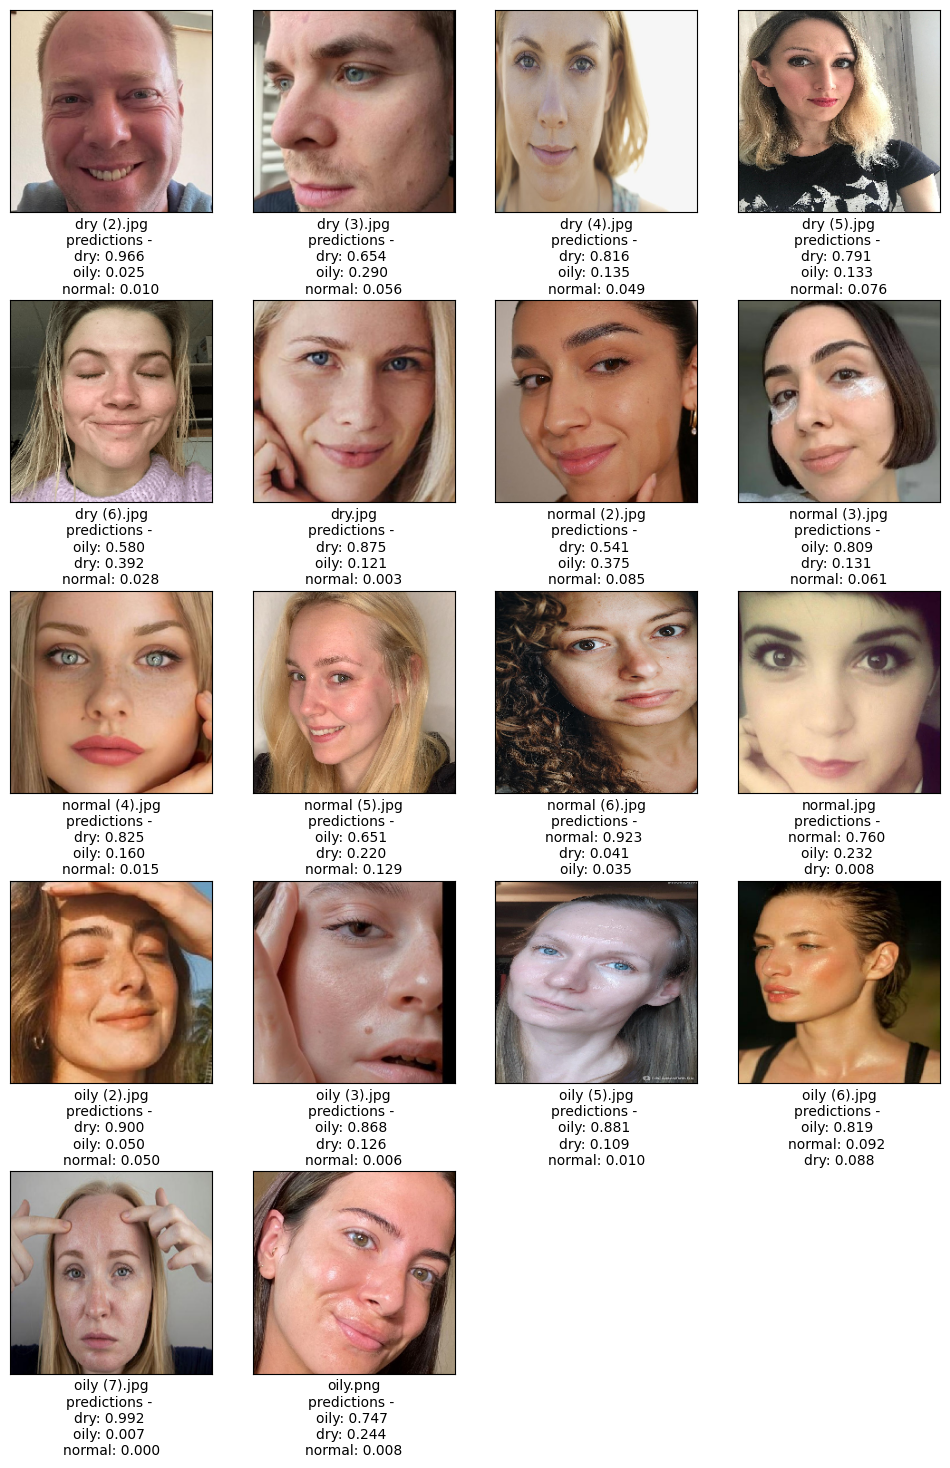

In [ ]:
plt.figure(figsize=(12,22))

for i, fn in enumerate(uploaded.keys()):
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(224, 224))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  x = preprocess_func(x)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)[0]
  preds = [
      {'skin':'dry', 'probability':classes[0]},
      {'skin':'normal', 'probability':classes[1]},
      {'skin':'oily', 'probability':classes[2]},
      ]
  preds = sorted(preds, key= lambda pred: pred['probability'], reverse=True)
  plt.subplot(6,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img, cmap='gray')
  plt.xlabel(fn + '\npredictions - \n'+ ' \n'.join([f'{pred["skin"]}: {pred["probability"]:.3f}' for pred in preds]))

In [ ]:
skin_classes = list(train_generator.class_indices)
skin_classes

['Dry Skin', 'Normal Skin', 'Oily Skin']

In [ ]:
model.save('./skin_type_recognition_model.h5')

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


In [ ]:
import pickle

with open('./skin_type_list.pkl', mode='wb') as skin_list_file:
  pickle.dump(skin_classes, skin_list_file)